In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_theme()

In [2]:
all_stimuli = "FeatureClassificationTesting\\all_stimuli.csv"
electric_E3_stimuli = "FeatureClassificationTesting\\electric_E3_stimuli.csv"
heat_H3_stimuli = "FeatureClassificationTesting\\heat_H3_stimuli.csv"
intense = "FeatureClassificationTesting\\intense.csv"

paths = [all_stimuli, electric_E3_stimuli, heat_H3_stimuli, intense]

In [3]:
data1 = pd.read_csv(all_stimuli)
data2 = pd.read_csv(electric_E3_stimuli)
data3 = pd.read_csv(heat_H3_stimuli)
data4 = pd.read_csv(intense)

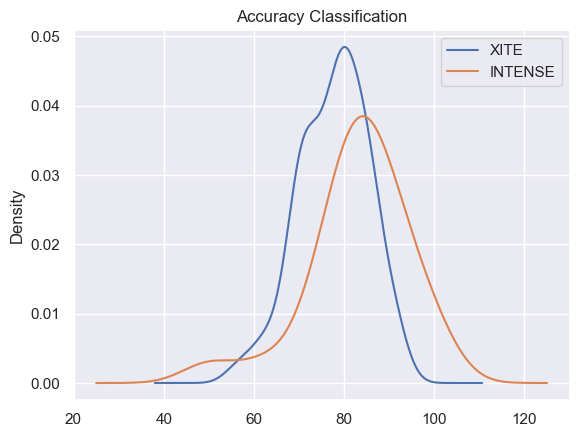

In [5]:
data1["accuracy"].plot.kde()
data4["accuracy"].plot.kde()
plt.legend(["XITE", "INTENSE"])
plt.title("Accuracy Classification")
plt.show()

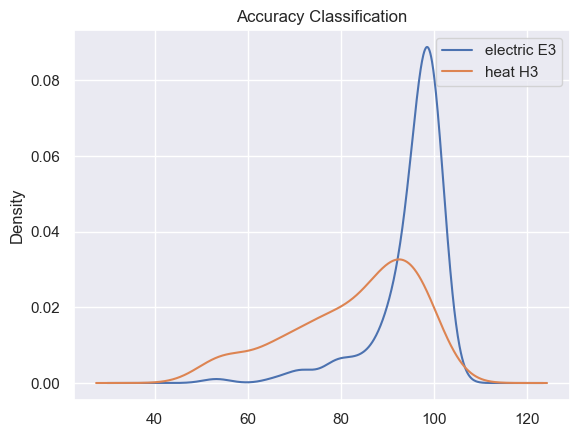

In [7]:
data2["accuracy"].plot.kde()
data3["accuracy"].plot.kde()
plt.legend(["electric E3", "heat H3"])
plt.title("Accuracy Classification")
plt.show()

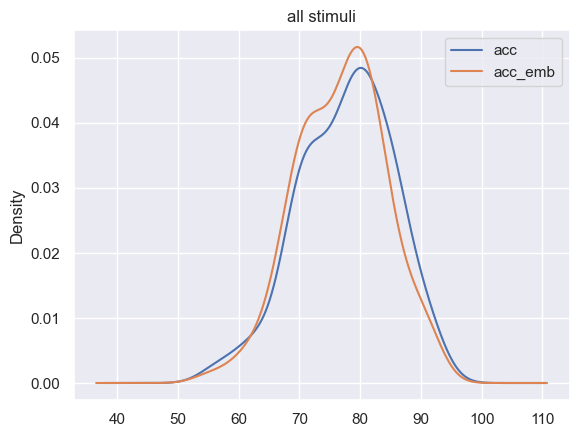

In [4]:
data1["accuracy"].plot.kde()
data1["accuracy_embedding"].plot.kde()
plt.legend(["acc", "acc_emb"])
plt.title("all stimuli")
plt.show()

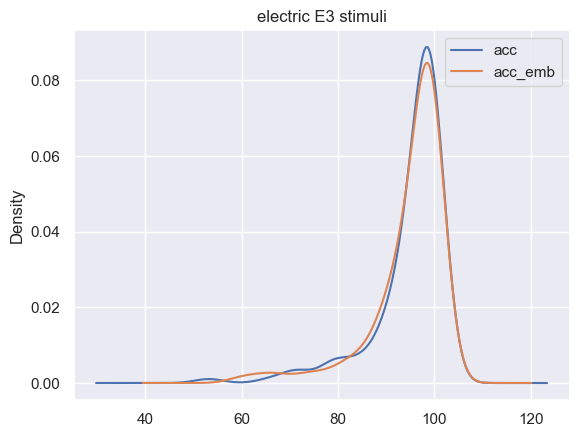

In [5]:
data2["accuracy"].plot.kde()
data2["accuracy_embedding"].plot.kde()
plt.legend(["acc", "acc_emb"])
plt.title("electric E3 stimuli")
plt.show()

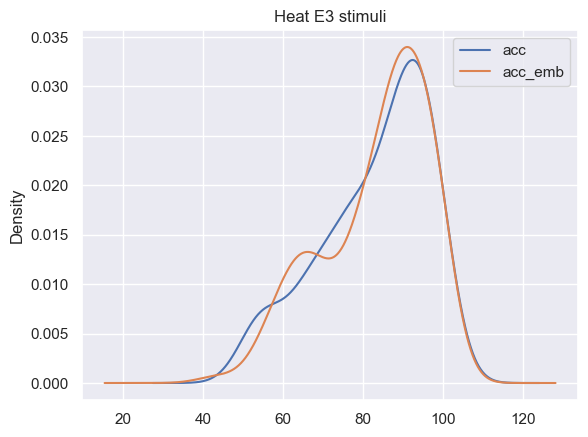

In [6]:
data3["accuracy"].plot.kde()
data3["accuracy_embedding"].plot.kde()
plt.legend(["acc", "acc_emb"])
plt.title("Heat E3 stimuli")
plt.show()

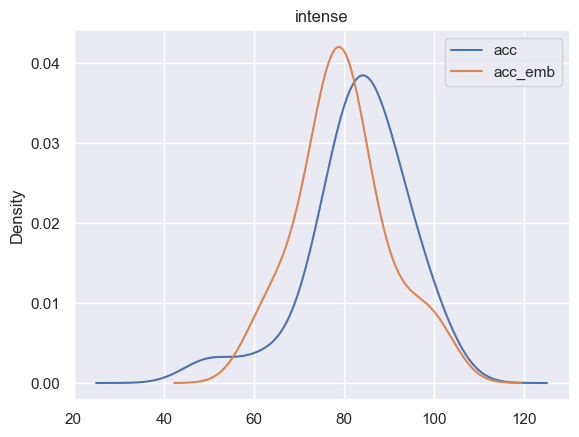

In [7]:
data4["accuracy"].plot.kde()
data4["accuracy_embedding"].plot.kde()
plt.legend(["acc", "acc_emb"])
plt.title("intense")
plt.show()

In [15]:
results = pd.DataFrame([])
for file in paths:
    name = file.split("\\")[-1][:-4]
    data = pd.read_csv(file)

    t = []
    for key in pd.DataFrame(data.mean()).T.round(2).keys():
        tmp = str(pd.DataFrame(data.mean()).T.round(2)[key].values[0]) + " + " + str(pd.DataFrame(data.std()).T.round(2)[key].values[0])
        t.append(tmp)

    if len(t) > 4:
        t=t[1:]
    results = pd.concat([results, pd.DataFrame(t).T.rename(columns={0: "accuracy",  1:"time", 2:"accuracy_embedding", 3:"time_embedding"}, index={0: name})])

results   

,accuracy,time,accuracy_embedding,time_embedding
all_stimuli,77.65 + 7.69,85.84 + 9.42,76.8 + 7.26,45.27 + 6.0
electric_E3_stimuli,94.91 + 7.76,8.91 + 0.39,94.68 + 7.84,3.7 + 0.21
heat_H3_stimuli,82.85 + 13.42,10.63 + 0.95,83.27 + 13.04,5.88 + 0.56
intense,83.1 + 11.1,0.53 + 0.02,79.69 + 9.95,0.3 + 0.01
